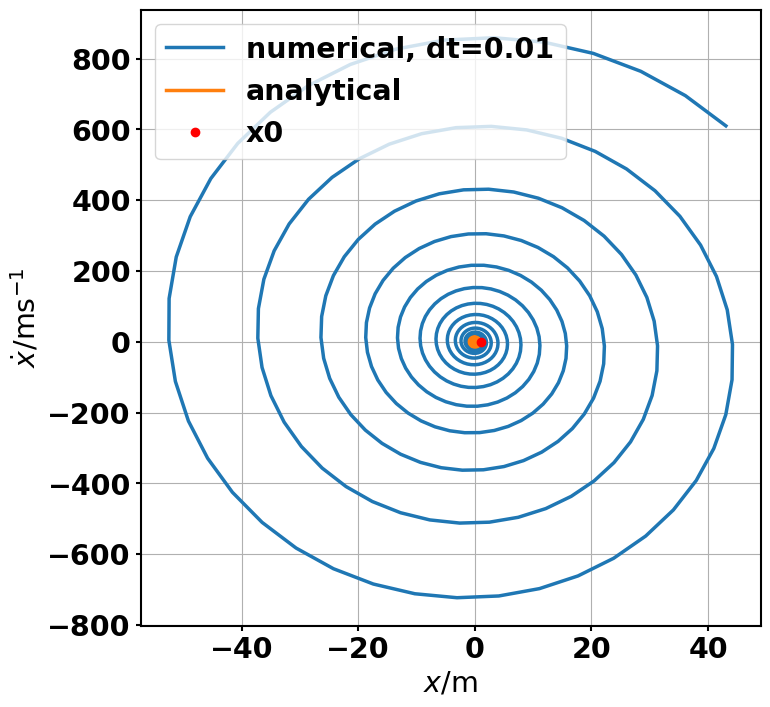

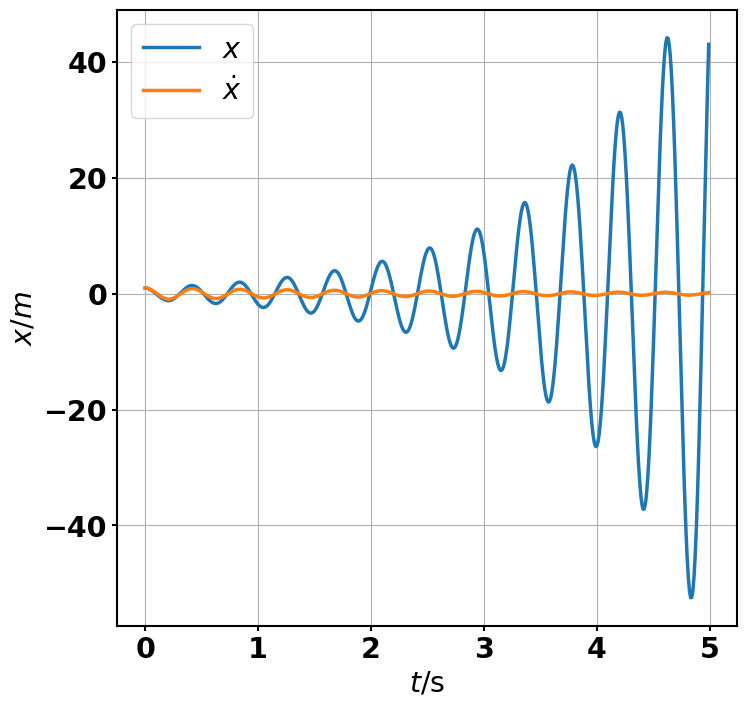

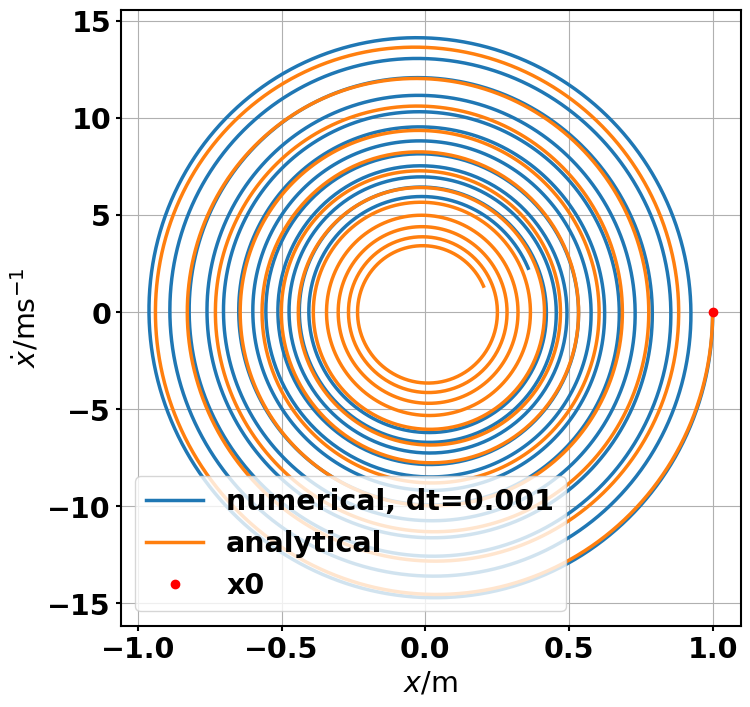

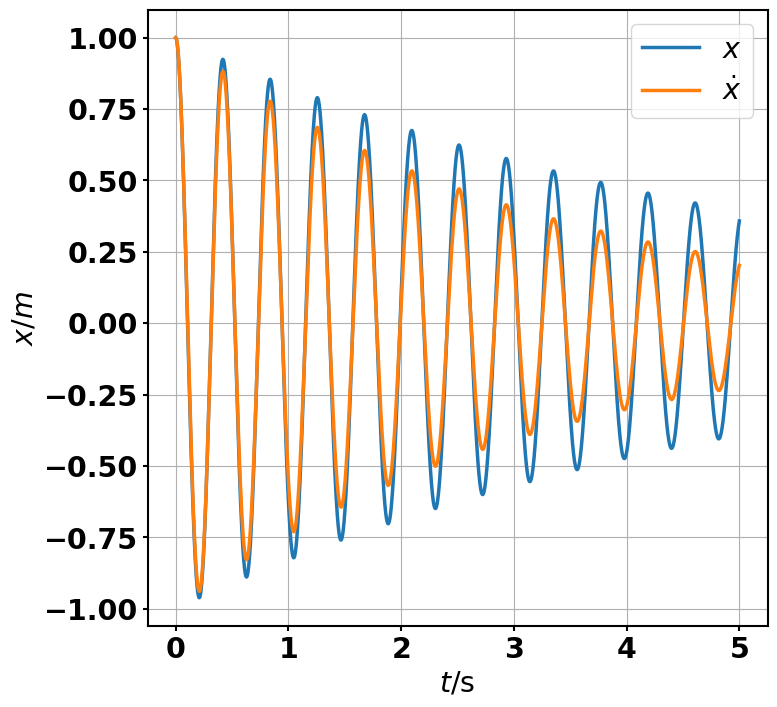

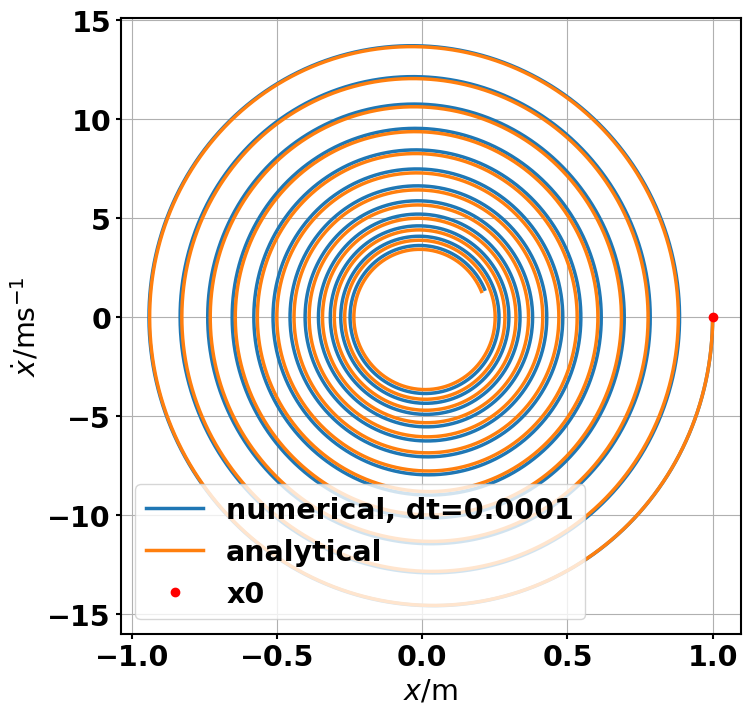

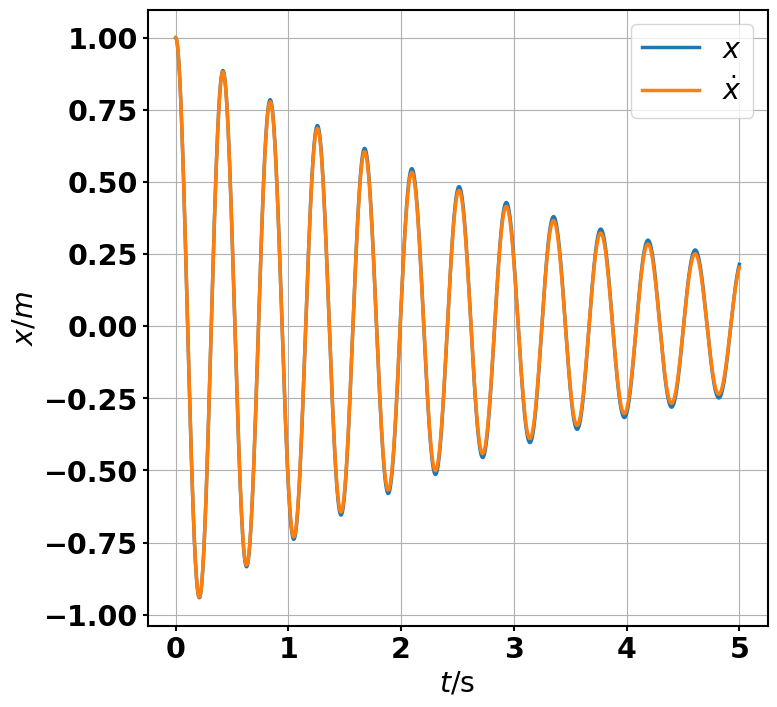

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import sys

sys.path.append('../')

from plot_config import *

def ana_num_comparison(dt_val = 0.001, T_val = 10):

    beta = 0.3 #s^-1
    omega = 15 # in s^-1

    M = np.array(
        [[0, 1],
        [-omega**2, -2*beta]])

    def sim(M, x0, dt, T):
        x = x0
        X = []
        for t in np.arange(0, T, dt):
            x = x + dt * M @ x
            X.append(x)
        
        return np.array(X)

    t=np.arange(0, T_val, dt_val)

    x0 = np.array([1, 0])
    X = sim(M, x0, dt_val, T_val)

    #analytical solution
    t_analytical = sp.symbols('t') 
    x_analytical = sp.exp(-beta*t_analytical)*(sp.cos(omega*t_analytical) + (x0[1] +beta*x0[0])/omega*sp.sin(omega*t_analytical))
    x_dot_analytical = sp.diff(x_analytical, t_analytical)
    x_analytical = sp.lambdify(t_analytical, x_analytical)
    x_dot_analytical = sp.lambdify(t_analytical, x_dot_analytical)

    X_analytical = np.vstack([x_analytical(t), x_dot_analytical(t)]).T

    plt.plot(X[:,0], X[:,1], label=f'numerical, dt={dt_val}')
    plt.plot(x_analytical(t), x_dot_analytical(t), label='analytical')


    # mark x0
    plt.plot(x0[0], x0[1], 'ro', label='x0')
    plt.grid()
    plt.xlabel(r'$x /$m')
    plt.ylabel(r'$\dot x /$ms$^{-1}$')
    plt.legend()

    plt.savefig(f'phase_space_{dt_val}:{T_val}.png')
    plt.show()
    # plot e, g vs t
    plt.plot(t, X[:,0], label=r'$x$')
    plt.plot(t, X_analytical[:,0], label=r'$\dot x$')
    #plt.plot(t, np.sin(t/dt_val), label='sampling frequency')

    plt.grid()
    plt.legend()

    plt.xlabel('$t$/s')
    plt.ylabel(r'$x/m$')
    plt.savefig(f'x_vs_t_{dt_val}:{T_val}.png')
    plt.show()


ana_num_comparison(dt_val=0.01, T_val=5)
ana_num_comparison(dt_val=0.001, T_val=5)
ana_num_comparison(dt_val=0.0001, T_val=5)